In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import seaborn as sns

In [2]:
data = pd.read_csv('listings.csv')

# Análisis exploratorio

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19410 entries, 0 to 19409
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            19410 non-null  int64  
 1   listing_url                                   19410 non-null  object 
 2   scrape_id                                     19410 non-null  int64  
 3   last_scraped                                  19410 non-null  object 
 4   source                                        19410 non-null  object 
 5   name                                          19410 non-null  object 
 6   description                                   18673 non-null  object 
 7   neighborhood_overview                         8986 non-null   object 
 8   picture_url                                   19410 non-null  object 
 9   host_id                                       19410 non-null 

In [4]:
data.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,18674,https://www.airbnb.com/rooms/18674,20250914152803,2025-09-15,city scrape,Huge flat for 8 people close to Sagrada Familia,110m2 apartment to rent in Barcelona. Located ...,Apartment in Barcelona located in the heart of...,https://a0.muscache.com/pictures/13031453/413c...,71615,...,4.62,4.82,4.32,ESFCTU000008058000039706000000000000000HUTB-00...,t,26,26,0,0,0.34
1,23197,https://www.airbnb.com/rooms/23197,20250914152803,2025-09-14,city scrape,"Forum CCIB DeLuxe, Spacious, Large Balcony, relax",Beautiful and Spacious Apartment with Large Te...,"Strategically located in the Parc del Fòrum, a...",https://a0.muscache.com/pictures/miso/Hosting-...,90417,...,4.99,4.66,4.68,ESFCTU000008106000547162000000000000000000HUTB...,f,1,1,0,0,0.52
2,32711,https://www.airbnb.com/rooms/32711,20250914152803,2025-09-15,city scrape,Sagrada Familia area - Còrsega 1,A lovely two bedroom apartment only 250 m from...,What's nearby <br />This apartment is located...,https://a0.muscache.com/pictures/357b25e4-f414...,135703,...,4.89,4.89,4.47,HUTB-001722,f,2,2,0,0,0.88
3,34241,https://www.airbnb.com/rooms/34241,20250914152803,2025-09-15,city scrape,Stylish Top Floor Apartment - Ramblas Plaza Real,Located in close proximity to Plaza Real and L...,NaN,https://a0.muscache.com/pictures/2437facc-2fe7...,73163,...,4.68,4.73,4.23,Exempt,f,3,3,0,0,0.14
4,34981,https://www.airbnb.com/rooms/34981,20250914152803,2025-09-15,city scrape,VIDRE HOME PLAZA REAL on LAS RAMBLAS,Spacious apartment for large families or group...,"Located in Ciutat Vella in the Gothic Quarter,...",https://a0.muscache.com/pictures/c4d1723c-e479...,73163,...,4.72,4.65,4.46,ESFCTU000008119000093652000000000000000HUTB-00...,f,3,3,0,0,1.49


In [6]:
data.isnull().sum().sum()
data["calendar_updated"].isnull().sum()

19410

***
Tenemos una base de datos con 19410 observaciones.

79 columnas de las cuales 23 tienen formato float64 20  int64 y 36 object.

Además tenemos 148085 datos nulos y la columna 49 'calendar_updated' sin datos
***

In [7]:
copia=data.copy()

#Preparación, limpieza y transformación de datos.



In [8]:
#Empecemos por elminar las variables menos relevantes para intentar reducir columnas
#y tener una base de datos más manejable, empezamos con estas ya que faltan más del 30% de los datos
# o son irrelevantes para la construcción de un modelo usando lógica; como ejemplo las urls
data = data.drop(columns=[
    'id', 'host_about', 'scrape_id', 'host_neighbourhood', 'neighbourhood',
    'calendar_updated', 'listing_url', 'last_scraped', 'source', 'name',
    'description', 'neighborhood_overview', 'picture_url', 'host_id',
    'host_url', 'host_name', 'host_thumbnail_url', 'host_picture_url',
    'calendar_last_scraped', 'license', 'first_review', 'last_review']
, errors='ignore')

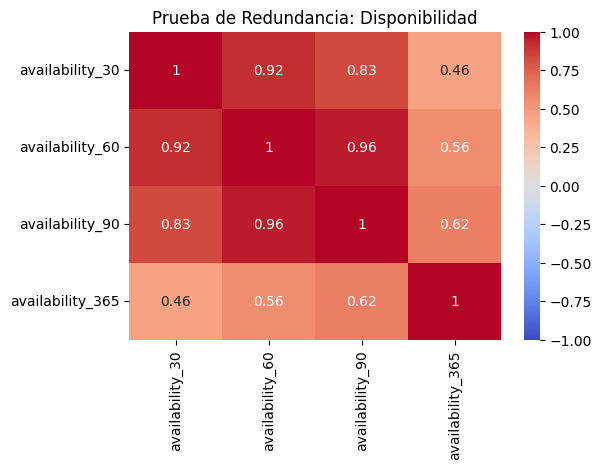

In [10]:
# Calculamos la correlación entre las columnas de disponibilidad
cols_avail = ['availability_30', 'availability_60', 'availability_90', 'availability_365']
correlacion = data[cols_avail].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Prueba de Redundancia: Disponibilidad")
plt.show()

In [11]:
#Ahora eliminamos columnas que tienen información redundante como 'bathrooms' y bathrooms_text'
#Las cuales pueden producir colinealidad o columnas que contienen información que ya se encuentra
#en otras columnas
data = data.drop(columns=[
    'bathrooms_text','host_listings_count','host_total_listings_count','calculated_host_listings_count_entire_homes'
    ,'calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms',
    'has_availability','availability_60','availability_90','number_of_reviews_ltm','number_of_reviews_l30d',
    'number_of_reviews_ly','first_review','last_review','minimum_minimum_nights','maximum_minimum_nights',
    'minimum_maximum_nights','maximum_maximum_nights','minimum_nights_avg_ntm','maximum_nights_avg_ntm']
, errors='ignore')

In [12]:
#Transformamos 'Price' a númerico para poder hacer un mejor análisis de las variables sobre el precio
data['price'] = data['price'].astype(str).str.replace('$', '', regex=False)
data['price'] = data['price'].str.replace(',', '', regex=False)
data['price'] = pd.to_numeric(data['price'], errors='coerce')

In [13]:
#Para rubros como amenidades y verificaciones las cuales muy probablemente tengan impacto en la confianza
#y valor del inmueble contaremos cuantas de ellas hay y las sumaremos para que tengan un valor significativo
#De otra forma sería muy difícil separarlas en; por ejemplo WiFi e Internet que son lo mismo pero escrito de una manera distinta
if 'amenities' in data.columns:
    data['n_amenities'] = data['amenities'].astype(str).str.count(',') + 1

if 'host_verifications' in data.columns:
    data['n_verifications'] = data['host_verifications'].astype(str).str.count(',') + 1

In [14]:
#Ya que hay demasiados tipos de propiedad, nos quedaremos con los top 5 y el resto son "Other".
if 'property_type' in data.columns:
    top_types = data['property_type'].value_counts().nlargest(5).index
    data['property_type_clean'] = data['property_type'].apply(lambda x: x if x in top_types else 'Other')

#Variables categóricas consistentes en formato

In [15]:
#Damos formato a las fechas como a la antiguedad para que haya coherencia y sentido en los datos
if 'host_since' in data.columns:
    data['host_since'] = pd.to_datetime(data['host_since'], errors='coerce')
    data['host_years'] = (pd.to_datetime("now") - data['host_since']).dt.days / 365

#Variables categóricas y numéricas codificadas

In [16]:
#Transformaremos estas variables en valores booleanos para poder ser utilizados en un modelo matemático
booleanos = ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'instant_bookable']
for col in booleanos:
    if col in data.columns:
        data[col] = data[col].map({'t': 1, 'f': 0})

In [17]:
#Para tiempo de respuesta asignamos números basándonos en la velocidad de respuesta (0 es el más rápido)
trespuesta = {'within an hour': 0,'within a few hours': 1,'within a day': 2,'a few days or more': 3}
if 'host_response_time' in data.columns:
    data['host_response_time'] = data['host_response_time'].map(trespuesta)
    data['host_response_time'] = data['host_response_time'].fillna(0)

In [18]:
# En 'neighbourhood_cleansed' no podemos hacer uso del Hot encoding, ya que crearíamos 70 columnas nuevas
# entonces reemplazamos el nombre del barrio por el porcentaje de los anuncios en ese barrio".
if 'neighbourhood_cleansed' in data.columns:
    freq_barrio = data['neighbourhood_cleansed'].value_counts(normalize=True)
    data['neighbourhood_cleansed_freq'] = data['neighbourhood_cleansed'].map(freq_barrio)

In [19]:
# Convertimos estas categóricas en columnas binarias (0 y 1)
roomtyngh = ['room_type', 'neighbourhood_group_cleansed']
cols_existentes = [c for c in roomtyngh if c in data.columns]
data = pd.get_dummies(data, columns=cols_existentes, drop_first=True)


In [20]:
#Pasamos a enteros para evitar problemas con el modelo
cols_bool = data.select_dtypes(include=['bool']).columns
data[cols_bool] = data[cols_bool].astype(int)

In [21]:
#Borramos las columnas de texto originales complejas que ya transformamos
cols_drop_final = ['amenities', 'host_verifications', 'neighbourhood_cleansed','property_type', 'host_location', 'host_since']
data = data.drop(columns=cols_drop_final, errors='ignore')

#Duplicados

In [22]:
#Buscamos inmuebles duplicados para eliminarlos de la base de datos buscando aquellos que tengan
#la misma latitud, longitud, precio y habitaciones. IMPORTANTE mencionar que incuimos precio y
#habitaciones ya que solamente con latitud y longitud podríamos estar habalndo de un inmueble
#distitno en una misma torre de apartamentos por ejemplo, con estos filtros nos aseguramos de
#eliminar solamente los verdaderos duplicados.
clave = ['latitude', 'longitude', 'price', 'bedrooms']
dups = data.duplicated(subset=clave).sum()
data.drop_duplicates(subset=clave, keep='first', inplace=True)
print(f"Se eliminaron {dups} duplicados.")
print(f"Datos restantes: {data.shape[0]}")

Se eliminaron 507 duplicados.
Datos restantes: 18903


#Datos faltantes

In [23]:
data.shape

(18903, 48)

In [24]:
data.isnull().sum()

host_response_time                                     0
host_response_rate                                  3084
host_acceptance_rate                                2711
host_is_superhost                                    380
host_has_profile_pic                                   5
host_identity_verified                                 5
latitude                                               0
longitude                                              0
accommodates                                           0
bathrooms                                           3975
bedrooms                                            1947
beds                                                4045
price                                               3985
minimum_nights                                         0
maximum_nights                                         0
availability_30                                        0
availability_365                                       0
number_of_reviews              

In [25]:
#Es necesario trabajar solamente con las filas que tengan información sobre el precio, por lo que
#eliminaremos las filas de 'Price' con datos faltantes
data = data.dropna(subset=['price'])

In [26]:
# Utilizamos 'IterativeImputer' para rellenar los valores faltantes en las variables
# camas, habitaciones, baños y capacidad. Este método modela cada característica
# en función de las otras, haciendo relaciones lógicas
# (ej. una propiedad con mayor capacidad tiende a tener más camas).
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
cols_relacionadas = ['accommodates', 'bedrooms', 'beds', 'bathrooms']
imputer = IterativeImputer(max_iter=10, random_state=0)
data[cols_relacionadas] = imputer.fit_transform(data[cols_relacionadas])
data[cols_relacionadas] = data[cols_relacionadas].round()

In [27]:
# Eliminamos los NA de'host_since','host_verifications', 'host_has_profile_pic' y 'host_identity_verified'
# ya que solo tenemos 3 datos faltantes los cuales representan aprox. 0.03%
columnasna = [
    'host_has_profile_pic',
    'host_identity_verified']
data = data.dropna(subset=columnasna)

In [28]:
#Ya que estamos hablando de tasas remplazaremos los valores faltantes por la mediana ya que usar
#el promedio podría afectar a otros hosts, pero primero transformamos la variable a una númerica
tasas = ['host_response_rate', 'host_acceptance_rate']
for col in tasas:
    if col in data.columns:
        data[col] = data[col].astype(str).str.replace('%', '', regex=False)
        data[col] = pd.to_numeric(data[col], errors='coerce')
        data[col] = data[col].fillna(data[col].median())

# Para las filas sin datos de 'reviews_per_month' se les asignará 0 como si no hubieran tenido una reseña ese mes
if 'reviews_per_month' in data.columns:
    data['reviews_per_month'] = data['reviews_per_month'].fillna(0)

# Para los puntajes asignaremos la Mediana ya que una vez más es un valor más justo
puntajes = [col for col in data.columns if 'review_scores' in col]
for col in puntajes:
    data[col] = data[col].fillna(data[col].median())

# Ya que es una variable cualitativa la mejor opción es usar la moda para rellenar los datos faltantes.
#Además ya que ser super host es algo sobre saliente es muy probable que la mayoría de hosts no lo sean
categ = ['host_response_time', 'host_is_superhost']
for col in categ:
    if col in data.columns:
        moda = data[col].mode()[0]
        data[col] = data[col].fillna(moda)

# En esta variable decidimos rellenar los datos con con 'Unknown' ya que es muy difícil intenatar predecir
#una ubicación geográfica
if 'host_location' in data.columns:
    data['host_location'] = data['host_location'].fillna("Unknown")


#Análisis y tratamiento de outliers.

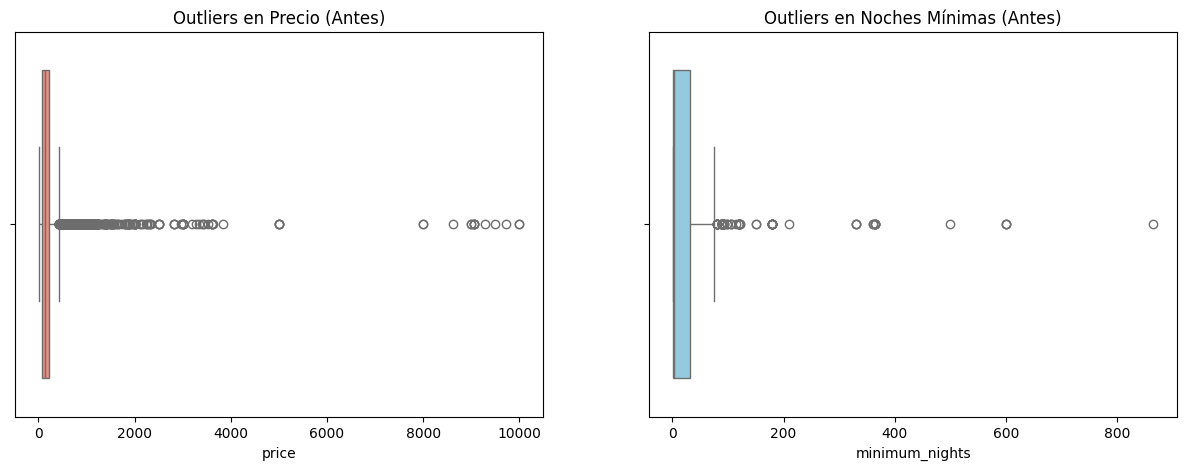

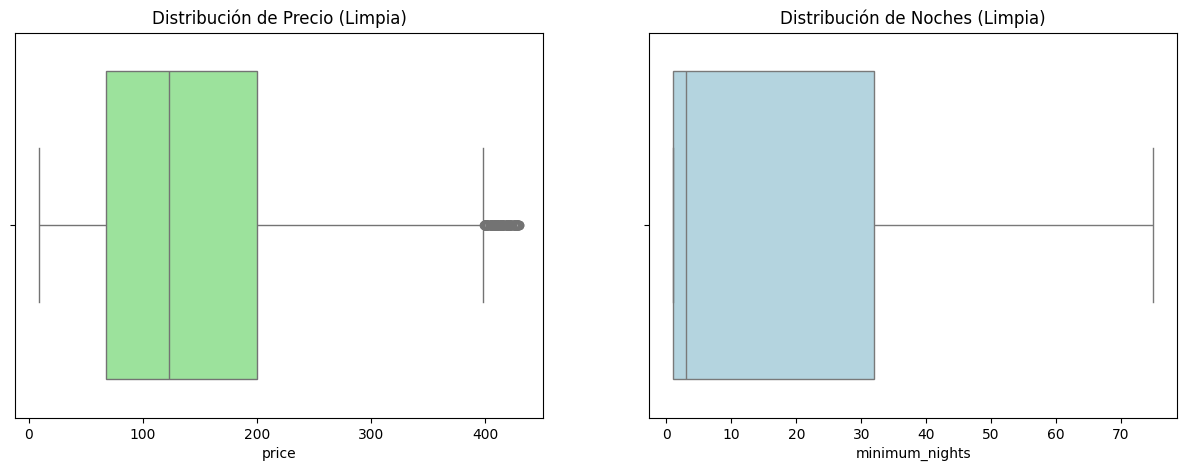

Se eliminaron un total de 864 outliers.
Se eliminaron mayores a 430.00€
Se eliminaron estancias mayores a 78.5 noches


In [29]:
#Graficamos dónde se encuentran los outliers actuales
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(x=data['price'], ax=axes[0], color='salmon')
axes[0].set_title('Outliers en Precio (Antes)')
sns.boxplot(x=data['minimum_nights'], ax=axes[1], color='skyblue')
axes[1].set_title('Outliers en Noches Mínimas (Antes)')
plt.show()
n_inicial = len(data)
#Eliminamos los outliers de la base de datos
def eliminar_outliers(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    li = Q1 - 1.5 * IQR
    ls = Q3 + 1.5 * IQR
    #Los almacenamos en otra variable
    data_limpio = df[(df[columna] >= li) & (df[columna] <= ls)].copy()
    return data_limpio, ls
data, limite_precio = eliminar_outliers(data, 'price')
data, limite_noches = eliminar_outliers(data, 'minimum_nights')
#Obtenemos el número de outliers eliminados
n_final = len(data)
n_eliminados = n_inicial - n_final
#Graficamos la distribución limpia o sin outliers
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(x=data['price'], ax=axes[0], color='lightgreen')
axes[0].set_title('Distribución de Precio (Limpia)')
sns.boxplot(x=data['minimum_nights'], ax=axes[1], color='lightblue')
axes[1].set_title('Distribución de Noches (Limpia)')
plt.show()

print(f"Se eliminaron un total de {n_eliminados} outliers.")
print(f"Se eliminaron mayores a {limite_precio:.2f}€")
print(f"Se eliminaron estancias mayores a {limite_noches} noches")

Ya tenemos la base de datos limpia, sin datos faltantes y lista para el análisis exploratorio

In [30]:
data.isnull().sum()

host_response_time                                  0
host_response_rate                                  0
host_acceptance_rate                                0
host_is_superhost                                   0
host_has_profile_pic                                0
host_identity_verified                              0
latitude                                            0
longitude                                           0
accommodates                                        0
bathrooms                                           0
bedrooms                                            0
beds                                                0
price                                               0
minimum_nights                                      0
maximum_nights                                      0
availability_30                                     0
availability_365                                    0
number_of_reviews                                   0
availability_eoy            

In [31]:
data.head()

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,bathrooms,...,room_type_Shared room,neighbourhood_group_cleansed_Eixample,neighbourhood_group_cleansed_Gràcia,neighbourhood_group_cleansed_Horta-Guinardó,neighbourhood_group_cleansed_Les Corts,neighbourhood_group_cleansed_Nou Barris,neighbourhood_group_cleansed_Sant Andreu,neighbourhood_group_cleansed_Sant Martí,neighbourhood_group_cleansed_Sants-Montjuïc,neighbourhood_group_cleansed_Sarrià-Sant Gervasi
0,0.0,96.0,91.0,0.0,1.0,1.0,41.405560,2.17262,8.0,2.0,...,0,1,0,0,0,0,0,0,0,0
1,0.0,100.0,96.0,1.0,1.0,1.0,41.412432,2.21975,5.0,2.0,...,0,0,0,0,0,0,0,1,0,0
2,0.0,100.0,100.0,0.0,1.0,1.0,41.405660,2.17015,6.0,2.0,...,0,0,1,0,0,0,0,0,0,0
3,0.0,100.0,92.0,0.0,1.0,1.0,41.380620,2.17517,2.0,1.0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,100.0,92.0,0.0,1.0,1.0,41.379780,2.17623,9.0,3.0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14051 entries, 0 to 19409
Data columns (total 48 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   host_response_time                                14051 non-null  float64
 1   host_response_rate                                14051 non-null  float64
 2   host_acceptance_rate                              14051 non-null  float64
 3   host_is_superhost                                 14051 non-null  float64
 4   host_has_profile_pic                              14051 non-null  float64
 5   host_identity_verified                            14051 non-null  float64
 6   latitude                                          14051 non-null  float64
 7   longitude                                         14051 non-null  float64
 8   accommodates                                      14051 non-null  float64
 9   bathrooms             

#Análisis Exploratorio de Datos

In [34]:
#Podemos observar que tener un máximo de 127 camas es ilogico por lo que probablemente es un error de dedo
#o computo de igual forma tener 0 camas y 0 baños no hace sentido ni es permitido, pondremos filtros
n_antes = len(data)
data = data[
    (data['beds'] > 0) & (data['beds'] <= 20) &
    (data['bathrooms'] > 0) & (data['bathrooms'] <= 10)
].copy()
# Cálculo de filas eliminadas
n_despues = len(data)
eliminados = n_antes - n_despues
print(f"Se eliminaron {eliminados} registros inconsistentes o extremos.")

Se eliminaron 636 registros inconsistentes o extremos.


Ahora si continuamos con el análisis

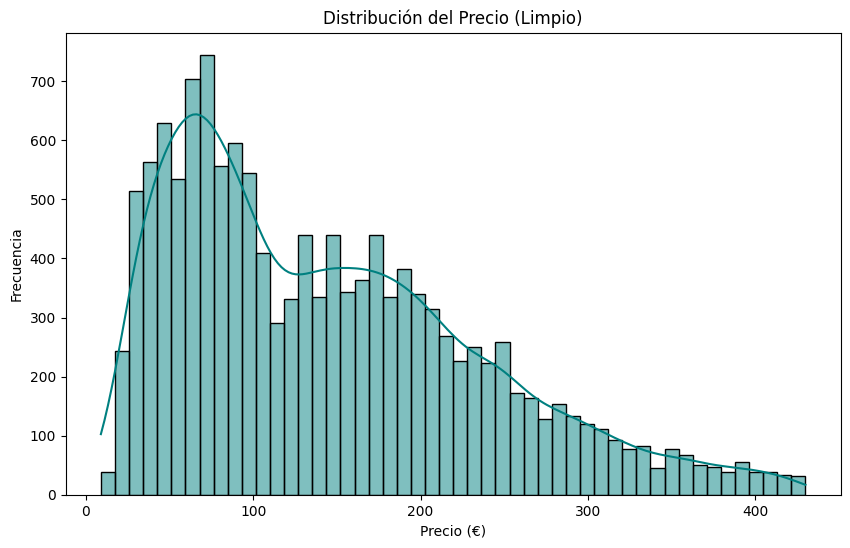

In [35]:
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], bins=50, kde=True, color='teal')
plt.title('Distribución del Precio (Limpio)')
plt.xlabel('Precio (€)')
plt.ylabel('Frecuencia')
plt.show()

C:\Users\jo_ga\AppData\Local\Temp\ipykernel_26552\4272359774.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='property_type_clean', y='price', data=data, palette='Set2')


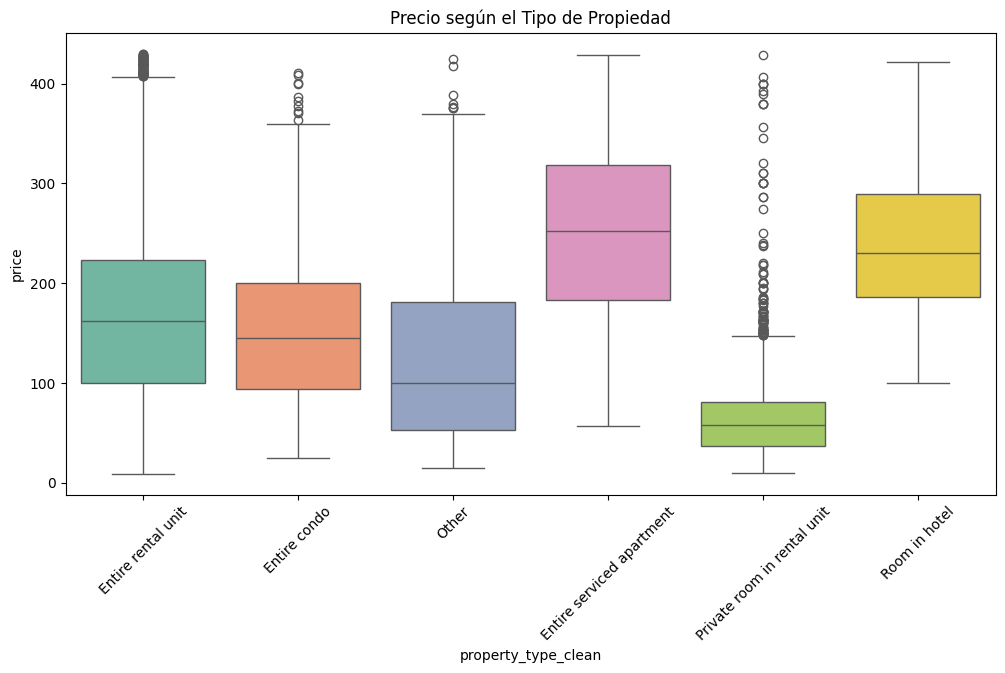

In [36]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='property_type_clean', y='price', data=data, palette='Set2')
plt.title('Precio según el Tipo de Propiedad')
plt.xticks(rotation=45)
plt.show()

C:\Users\jo_ga\AppData\Local\Temp\ipykernel_26552\1356646007.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='host_is_superhost', y='price', data=data, palette='Pastel1')


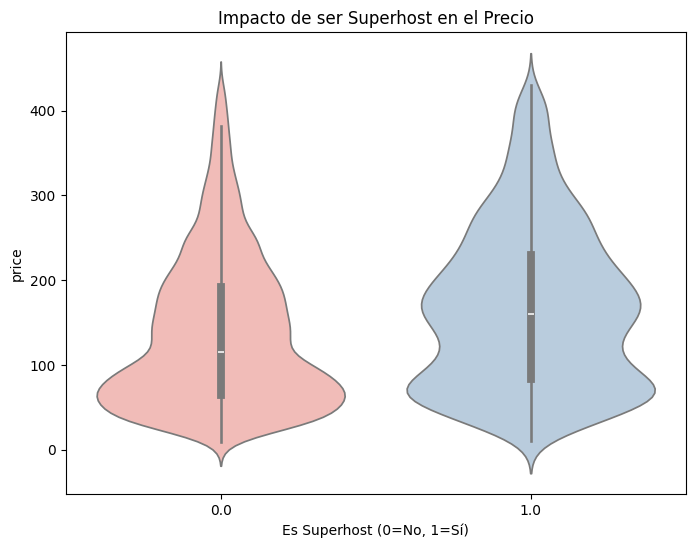

In [37]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='host_is_superhost', y='price', data=data, palette='Pastel1')
plt.title('Impacto de ser Superhost en el Precio')
plt.xlabel('Es Superhost (0=No, 1=Sí)')
plt.show()


Text(0.5, 1.0, 'Impacto de la Calificación en el Precio')

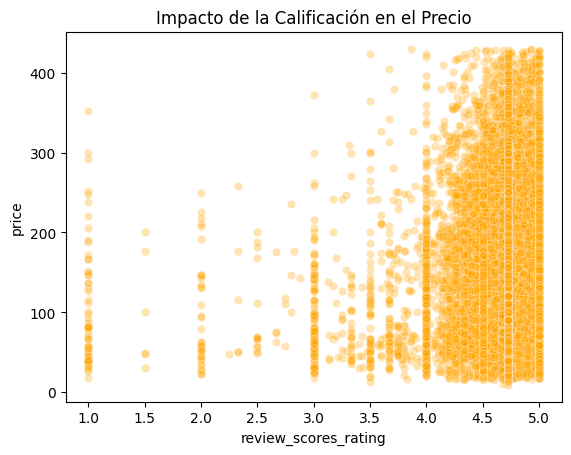

In [38]:
sns.scatterplot(x='review_scores_rating', y='price', data=data, alpha=0.3, color='orange')
plt.title('Impacto de la Calificación en el Precio')

Text(0.5, 1.0, 'Precio según Capacidad de Personas')

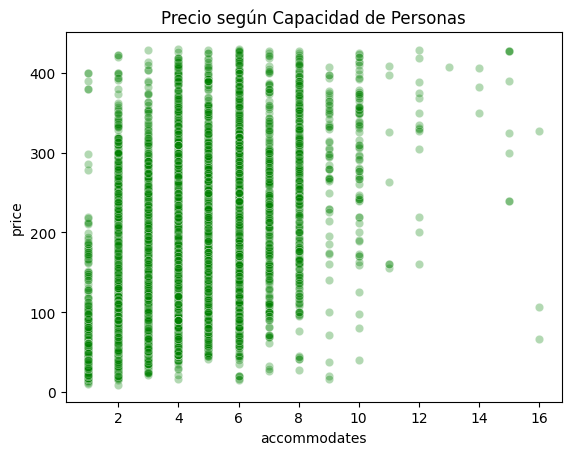

In [39]:
sns.scatterplot(x='accommodates', y='price', data=data, alpha=0.3, color='green')
plt.title('Precio según Capacidad de Personas')

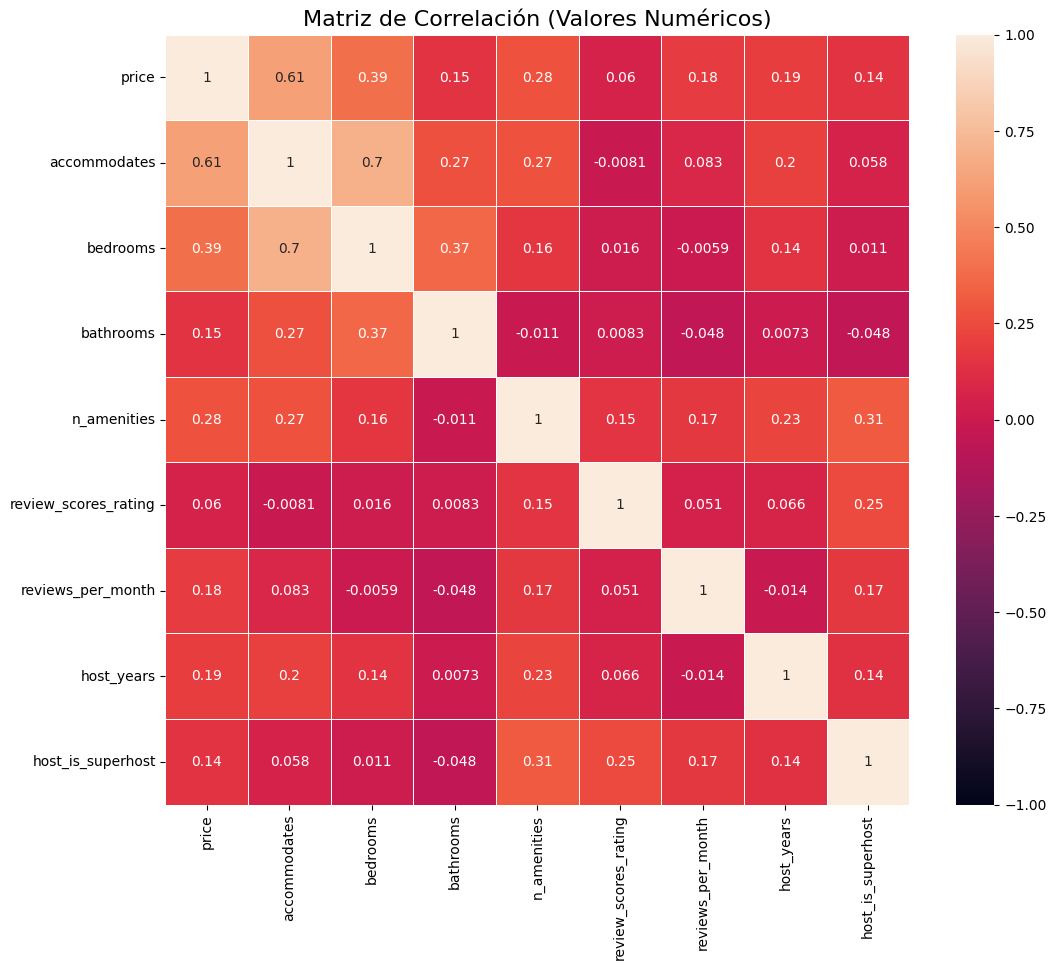

In [40]:
cols_heatmap = [
    'price',
    'accommodates',
    'bedrooms',
    'bathrooms',
    'n_amenities',
    'review_scores_rating',
    'reviews_per_month',
    'host_years',
    'host_is_superhost']
cols_existentes = [c for c in cols_heatmap if c in data.columns]
corr_matrix = data[cols_existentes].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_matrix,
    annot=True,
    vmin=-1, vmax=1,
    linewidths=0.5
)
plt.title('Matriz de Correlación (Valores Numéricos)', fontsize=16)
plt.show()

In [41]:
data.to_csv('BarcelonaAbnb_limpio.csv', index=False)
